In [ ]:
!pip install plot_keras_history
!pip install biopython

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8794 sha256=cf2824c80773be7b50363dbed03efcd2b89713704fa858d219ab5ec273f6fdf0
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7878 sha256=7b48e71c39db909b0de8d004b43bf9b3e9b2ff32ce9485d6869406082cf18266
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4588 sha256=79d5399f7c142652bd2963adba48aba73b77296c5af202968deb4242f81615fb
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json
     |████████████████████████████████| 2.3 MB 3.8 MB/s 


In [ ]:
from keras.utils.vis_utils import plot_model
import numpy as np
import os
import tensorflow as tf
import sys
import re
import random
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from plot_keras_history import plot_history
from Bio import SeqIO
from random import seed
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.patheffects as PathEffects
seed(10)

In [ ]:
def prot_matrix(seq):
    encoder = ['X', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    svv = [0 for x in range(41)]
    i = 0
    ra = len(seq)
    for i in range(ra):
        value = encoder.index(seq[i])
        svv[i] = value
    return svv

In [ ]:
dat_y= []
lines = []
fname = "sites.fasta"

checkSet = {'X', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'}

for seq_record in SeqIO.parse(fname, "fasta"):
    seq = str(seq_record.seq)
    label = str(seq_record.id)
    if set(seq).issubset(checkSet) and len(label)==1:
      lines.append(seq.upper())
      dat_y.append(label)

n = len(lines)
for i in range(n):
	tem = lines[i].rstrip()
	if i==0:
		dat_x = np.zeros((n,41))
	dat_x[i,] = prot_matrix(tem)

x_train = dat_x
y_train = dat_y

In [ ]:
x_train[0:3]

array([[ 4.,  9., 17.,  8., 13.,  3.,  7.,  3.,  8., 10.,  2.,  1.,  6.,
         5., 13.,  2., 14.,  1.,  5., 16.,  8., 16.,  6.,  9., 14.,  9.,
         6.,  5.,  4.,  3., 16., 15.,  6., 17., 10.,  5.,  5.,  3.,  8.,
         1., 15.],
       [13.,  3.,  7.,  3.,  8., 10.,  2.,  1.,  6.,  5., 13.,  2., 14.,
         1.,  5., 16.,  8., 16.,  6.,  9., 14.,  9.,  6.,  5.,  4.,  3.,
        16., 15.,  6., 17., 10.,  5.,  5.,  3.,  8.,  1., 15.,  8., 18.,
        15.,  4.],
       [15.,  8., 18., 15.,  4.,  9.,  9., 13.,  9., 18., 18.,  5., 11.,
         4., 12., 18.,  9., 12.,  5.,  1., 16.,  7.,  3., 12.,  6., 12.,
        17., 10.,  4., 18., 18.,  9., 12., 17., 11., 12.,  4., 10.,  3.,
        20., 16.]])

In [ ]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train).astype('float32').reshape((-1,1))

In [ ]:
x_train.shape

(187658, 41)

In [ ]:
y_train.shape

(187658, 1)

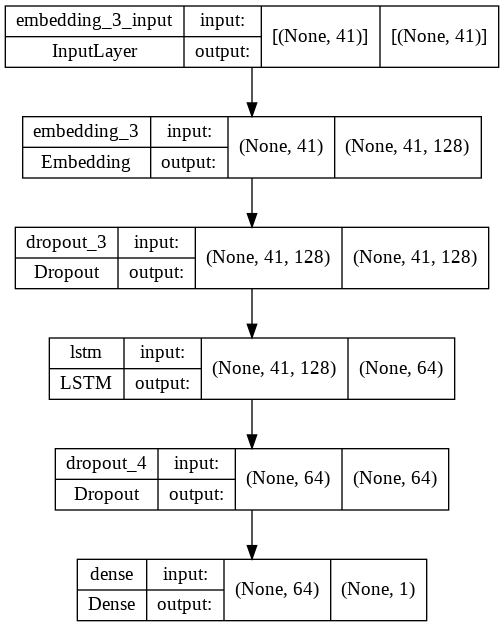

In [ ]:
from keras.layers import Embedding
from keras.layers import LSTM

embed_dim = 128
lstm_out = 64
batch_size = 128

model = Sequential()
model.add(Embedding(21, embed_dim, input_length= 41))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

plot_model(model, show_shapes=True, show_layer_names=True)


Epoch 1/100
1467/1467 [==============================] - 32s 15ms/step - loss: 0.5306 - accuracy: 0.7228
Epoch 2/100
1467/1467 [==============================] - 27s 18ms/step - loss: 0.4904 - accuracy: 0.7525
Epoch 3/100
1467/1467 [==============================] - 22s 15ms/step - loss: 0.4789 - accuracy: 0.7590
Epoch 4/100
1467/1467 [==============================] - 22s 15ms/step - loss: 0.4706 - accuracy: 0.7643
Epoch 5/100
1467/1467 [==============================] - 21s 15ms/step - loss: 0.4625 - accuracy: 0.7693
Epoch 6/100
1467/1467 [==============================] - 21s 14ms/step - loss: 0.4533 - accuracy: 0.7751
Epoch 7/100
1467/1467 [==============================] - 21s 15ms/step - loss: 0.4438 - accuracy: 0.7818
Epoch 8/100
1467/1467 [==============================] - 22s 15ms/step - loss: 0.4341 - accuracy: 0.7874
Epoch 9/100
1467/1467 [==============================] - 21s 15ms/step - loss: 0.4249 - accuracy: 0.7930
Epoch 10/100
1467/1467 [==============================]

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec9286d4d0>,
       dtype=object))

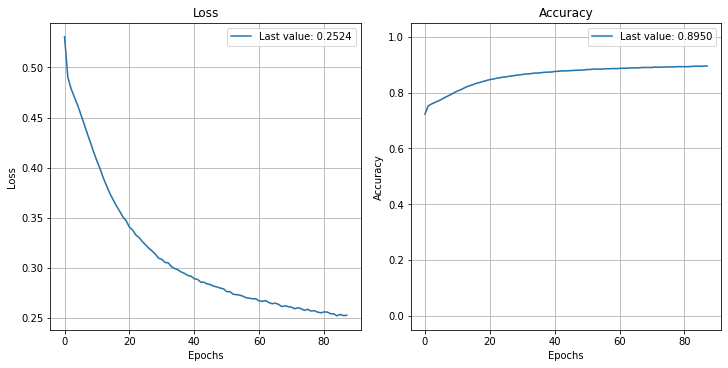

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=3, mode='min')
history = model.fit(x_train, y_train, batch_size, epochs=100, verbose=1, validation_data= None, callbacks=[early_stopping])
plot_history(history)

In [ ]:
from keras import Model
lstmModel = Model(model.input, model.get_layer('dropout_4').output)

featuresForML = lstmModel.predict(x_train)

In [ ]:
model.input

<KerasTensor: shape=(None, 41) dtype=float32 (created by layer 'embedding_3_input')>

In [ ]:
lstmModel.save('LSTM_model.h5')

In [ ]:
featuresForML

array([[ 4.24074471e-01,  1.07329614e-01,  3.02487635e-03, ...,
         1.36151398e-02,  1.32743353e-02,  2.92145535e-02],
       [ 2.66466528e-01,  3.92045453e-03, -5.36455154e-01, ...,
         1.20196026e-02, -1.11185415e-02,  1.21887513e-01],
       [-1.08116433e-01,  6.94672048e-01,  7.16050863e-02, ...,
        -4.29444999e-01,  1.65423408e-01,  3.46578211e-01],
       ...,
       [ 5.92973025e-04, -8.85206103e-01,  3.56450081e-02, ...,
         8.51132199e-02, -4.14378792e-01, -7.88806796e-01],
       [-2.66140789e-01,  1.32184178e-02, -4.01860505e-01, ...,
         8.09876382e-01, -2.97025561e-01, -6.86189592e-01],
       [ 9.75733157e-03, -9.47194874e-01, -7.23374486e-01, ...,
         6.42052174e-01, -3.94307941e-01, -7.52728701e-01]], dtype=float32)

# **TSNE PLOT**

In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    # print(num_classes)
    palette = np.array(sns.color_palette("rocket", num_classes))


    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)],alpha=0.9)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    # ax.legend(['1'])
    # ax.legend(['0'])
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.mean(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
len(featuresForML)

187658

In [ ]:
label = [1] * 1000 + [0] * 1000
labels = np.array(label)
len(label)

2000

In [ ]:
features_1 = featuresForML[0:1000]
features_0 = featuresForML[186658:187658]
features = []
features.extend(features_1)
features.extend(features_0)
print(len(features_1),len(features_0),len(features))

1000 1000 2000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(features)


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.30309705 0.06763315 0.052512   0.0363544 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


(<Figure size 2400x2400 with 1 Axes>,
 [Text(-1.2864721326679587, 0.26774743887461544, '0'),
  Text(1.2864721326679596, -0.26774743887461555, '1')])

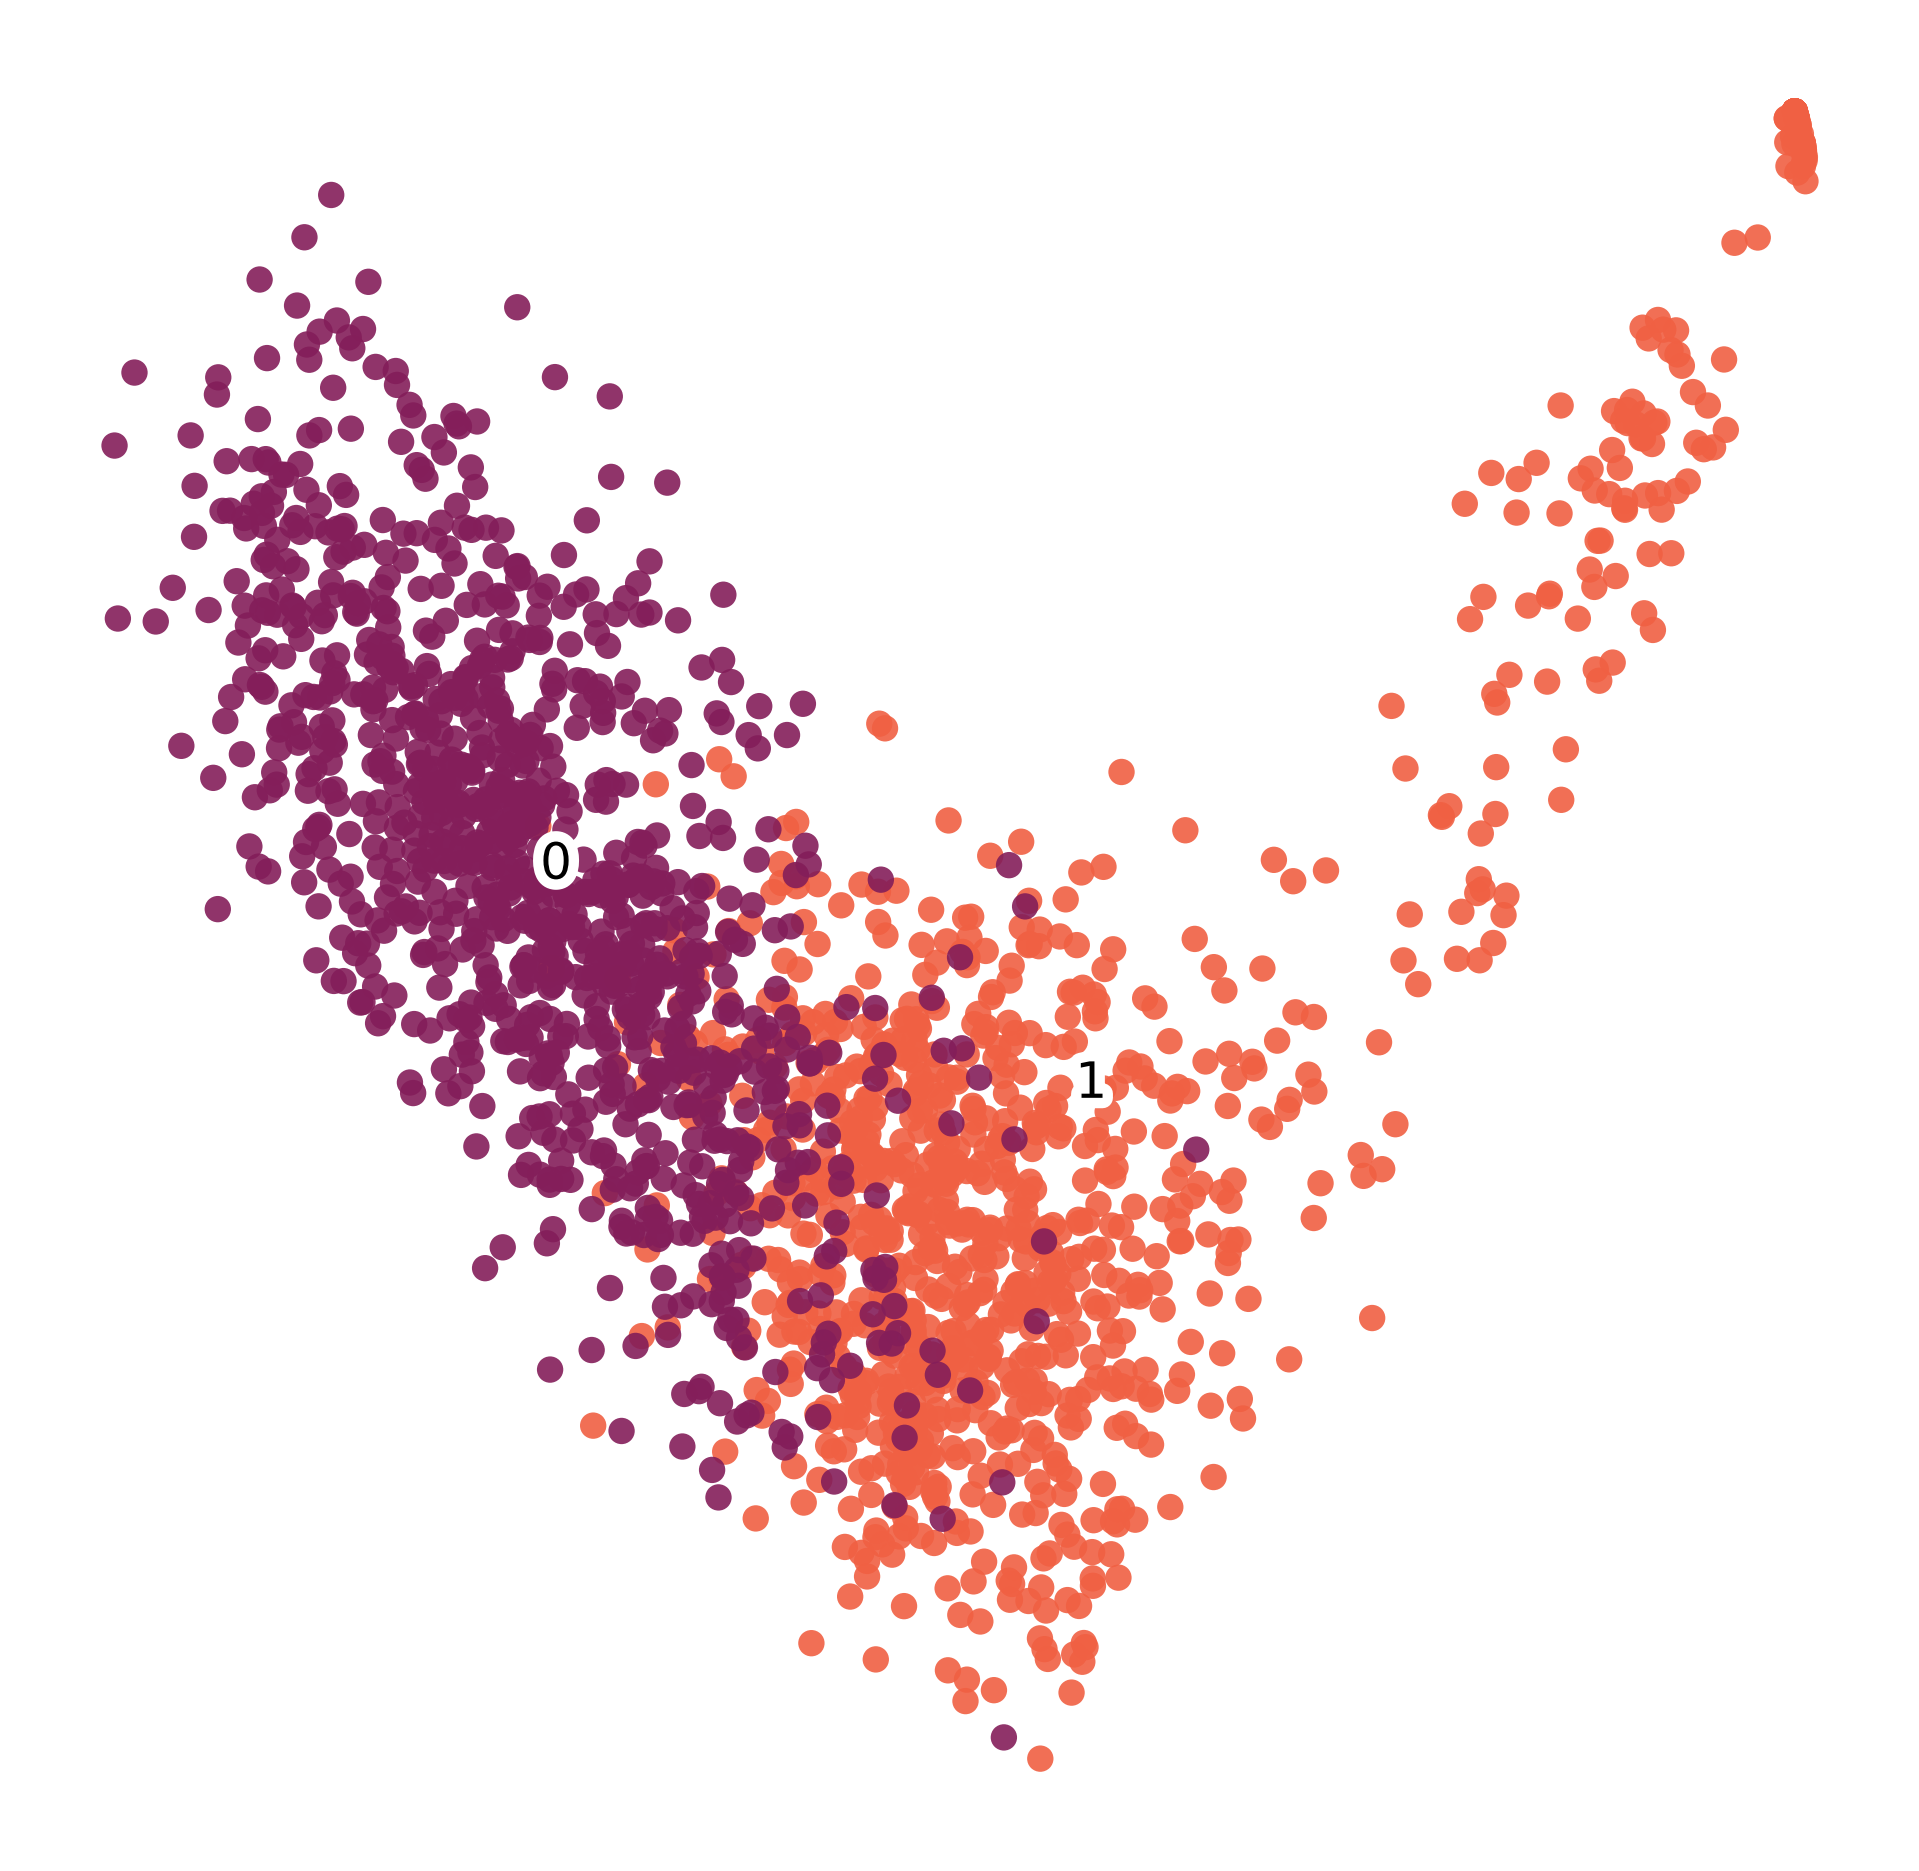

In [ ]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,labels)

# **Plots**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

In [ ]:
X1 = featuresForML
Y1 = y_train

In [ ]:
len(X1),len(Y1)

(187658, 187658)

##Classifiers

In [ ]:
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

## Self Consistency and Graphs

In [ ]:
print('Self-Consistency Random Forest')
clf = clf1.fit(X1, Y1)
pred=np.round(clf.predict(X1))
tn, fp, fn, tp = confusion_matrix(Y1, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y1, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y1))]
lr_probs=clf.predict_proba(X1)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y1, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y1, lr_probs)
auc_score = round(roc_auc_score(Y1, lr_probs),2)



Self-Consistency Random Forest


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 99.7
Sensitivity/Recall: 99.55
Specificity: 99.87
MCC: 0.99397
Precision: 99.88
F1_Score: 99.71


In [ ]:
import joblib
joblib.dump(clf1, "/content/drive/MyDrive/Models/random_forest1.joblib")

['/content/drive/MyDrive/Models/random_forest1.joblib']

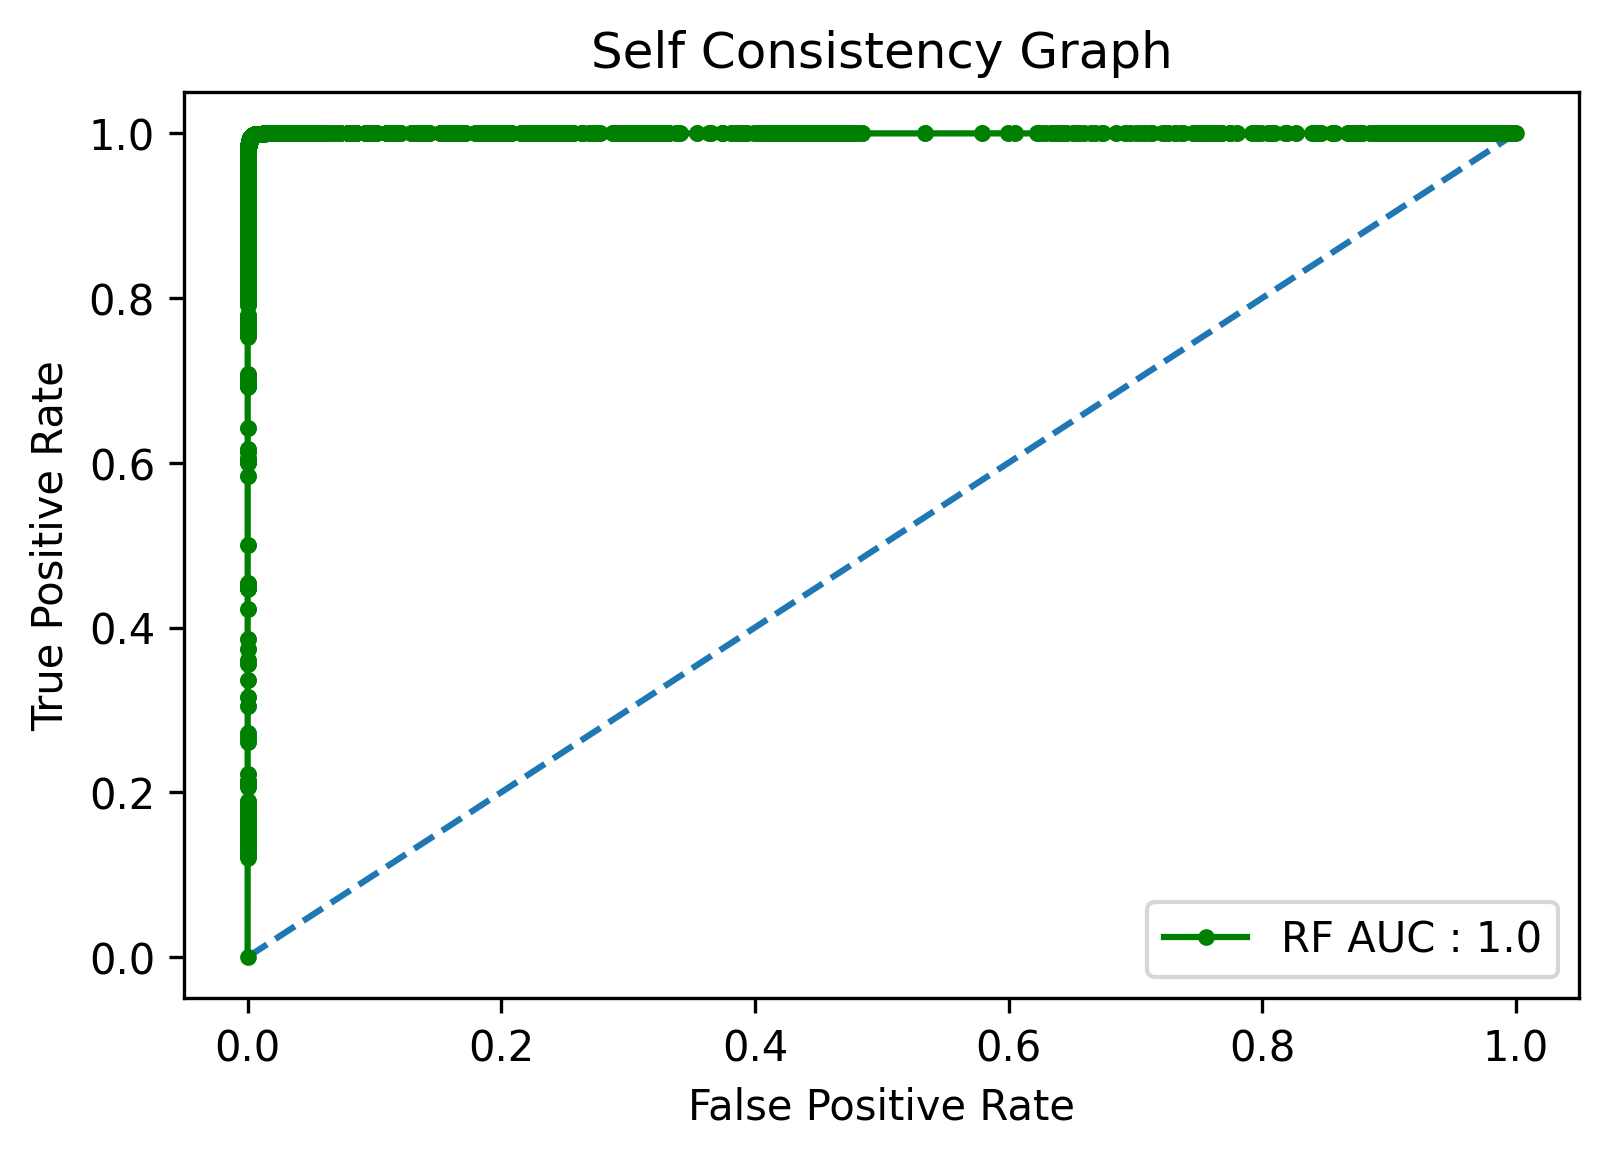

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib import pyplot
pyplot.title("Self Consistency Graph")
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : '+str(auc_score))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import pickle
filename = 'RF_model.sav'
pickle.dump(clf1, open(filename, 'wb'))

## Independent Dataset Testing and Graphs

In [ ]:
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
print('Independent Dataset Test Random Forest')
clf=clf1.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)


In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib import pyplot
pyplot.title("Independent Dataset Test Graph")
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : '+str(auc_score))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 10-fold Cross-Validation

In [ ]:
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

In [ ]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

print('10-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X1, Y1):
  print("Fold : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1


ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib import pyplot
pyplot.title("10 Cross validation Graph")
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : '+str(auc_score))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 05-fold Cross-Validation

In [ ]:
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

In [ ]:
kfold=StratifiedKFold(n_splits=5, shuffle=True)

print('05-fold Cross-Validation Random Forest')
iterator = 1
for train, test in kfold.split(X1, Y1):
  print("Fold : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
  sp = np.round((tn / (fp + tn)) * 100, 2)
  sn = np.round((tp / (tp + fn)) * 100, 2)
  mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
  pre = np.round((tp / (tp + fp)) * 100, 2)
  f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
  print("Accuracy: " + str(acc))
  print("Sensitivity/Recall: " + str(sn))
  print("Specificity: " + str(sp))
  print("MCC: " + str(mcc))
  print("Precision: " + str(pre))
  print("F1_Score: " + str(f1))
  iterator = iterator+1

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib import pyplot
pyplot.title("05-fold Cross-Validation")
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : '+str(auc_score))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Jackknife Testing

In [ ]:
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

In [ ]:
kfold=KFold(n_splits=1000, shuffle=True)

print('Jackknife Testing Random Forest')
iterator = 1
acc = 0
sp = 0
sn = 0
mcc = 0
pre = 0
f1 = 0

for train, test in kfold.split(X1, Y1):
  print("Iteration : " + str(iterator))
  X_train = X1[train]
  Y_train = Y1[train]
  X_test = X1[test]
  Y_test = Y1[test]
  clf=clf1.fit(X_train, Y_train)
  pred=np.round(clf.predict(X_test))
  tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
  acc = acc + np.nan_to_num(np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2))
  sp = sp + np.nan_to_num(np.round((tn / (fp + tn)) * 100, 2))
  sn = sn + np.nan_to_num(np.round((tp / (tp + fn)) * 100, 2))
  mcc = mcc + np.nan_to_num(np.round(matthews_corrcoef(Y_test, pred), 5))
  pre = pre + np.nan_to_num(np.round((tp / (tp + fp)) * 100, 2))
  f1 = f1 + np.nan_to_num(np.round(2 * (pre * sn) / (pre + sn), 2))
  iterator = iterator+1

print("Average Accuracy: " + str(np.round(acc/1000,2)))
print("Average Sensitivity/Recall: " + str(np.round(sn/1000, 2)))
print("Average Specificity: " + str(np.round(sp/1000, 2)))
print("Average MCC: " + str(np.round(mcc/1000, 5)))
print("Average Precision: " + str(np.round(pre/1000, 2)))
print("Average F1_Score: " + str(np.round(f1/1000, 2)))


ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

In [ ]:
f1

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from matplotlib import pyplot
pyplot.title("Jackknife Testing")
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : '+str(auc_score))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()